In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier




/var/folders/yj/rvwvcq2x2nj9j_gzg45kqw6c0000gn/T/ipykernel_5735/1424356386.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data Loading and Preprocessing

In [2]:
import os
import zipfile

# Set Kaggle configuration
os.environ["KAGGLE_CONFIG_DIR"] = os.path.expanduser("~/.kaggle")

# Dataset identifier
dataset = "ankitverma2010/ecommerce-customer-churn-analysis-and-prediction"

# Download dataset
os.system(f"kaggle datasets download -d {dataset}")

# Extract dataset
zip_file = "ecommerce-customer-churn-analysis-and-prediction.zip"  # Name of the downloaded zip file
extract_folder = "dataset"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)  # Extract contents to 'dataset' folder

print("Dataset downloaded and extracted successfully!")

# Verify extracted files
extracted_files = os.listdir(extract_folder)
print("Extracted files:", extracted_files)

# Update the file path to the actual CSV file name
file_path = os.path.join(extract_folder, "E Commerce Dataset.csv")  # Update if needed
print("Dataset file path:", file_path)





Dataset URL: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction
License(s): CC-BY-NC-SA-4.0
ecommerce-customer-churn-analysis-and-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset downloaded and extracted successfully!
Extracted files: ['E Commerce Dataset.xlsx']
Dataset file path: dataset/E Commerce Dataset.csv


In [3]:
df=pd.read_excel(r'dataset/E Commerce Dataset.xlsx',sheet_name="E Comm")

In [4]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [5]:
df.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   8 non-null      float64
 1   Churn                        8 non-null      float64
 2   Tenure                       8 non-null      float64
 3   CityTier                     8 non-null      float64
 4   WarehouseToHome              8 non-null      float64
 5   HourSpendOnApp               8 non-null      float64
 6   NumberOfDeviceRegistered     8 non-null      float64
 7   SatisfactionScore            8 non-null      float64
 8   NumberOfAddress              8 non-null      float64
 9   Complain                     8 non-null      float64
 10  OrderAmountHikeFromlastYear  8 non-null      float64
 11  CouponUsed                   8 non-null      float64
 12  OrderCount                   8 non-null      float64
 13  DaySinceLastOrder      

In [6]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [8]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [11]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [12]:
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['customerid', 'churn', 'tenure', 'preferredlogindevice', 'citytier',
       'warehousetohome', 'preferredpaymentmode', 'gender', 'hourspendonapp',
       'numberofdeviceregistered', 'preferedordercat', 'satisfactionscore',
       'maritalstatus', 'numberofaddress', 'complain',
       'orderamounthikefromlastyear', 'couponused', 'ordercount',
       'daysincelastorder', 'cashbackamount'],
      dtype='object')

In [13]:
import matplotlib.font_manager as fm
fm._load_fontmanager()



In [14]:
import matplotlib.font_manager as fm

# List all available fonts
available_fonts = [f.name for f in fm.fontManager.ttflist]
print("DejaVu Sans" in available_fonts)  # Should print True


True


## Creating plots for EDA including Univariate Analysis , Multivariate Analysis and Bi Variate Analysis

In [15]:
# segemnt the columns of the DataFrame into two lists based on the number of unique values each column contains
count_col = []
hist_col = []
for column in df.columns:
    unique_value = df[column].nunique()
    if unique_value <= 20:
        count_col.append(column)
    else:
        hist_col.append(column)

#### Countplots of categorical columns

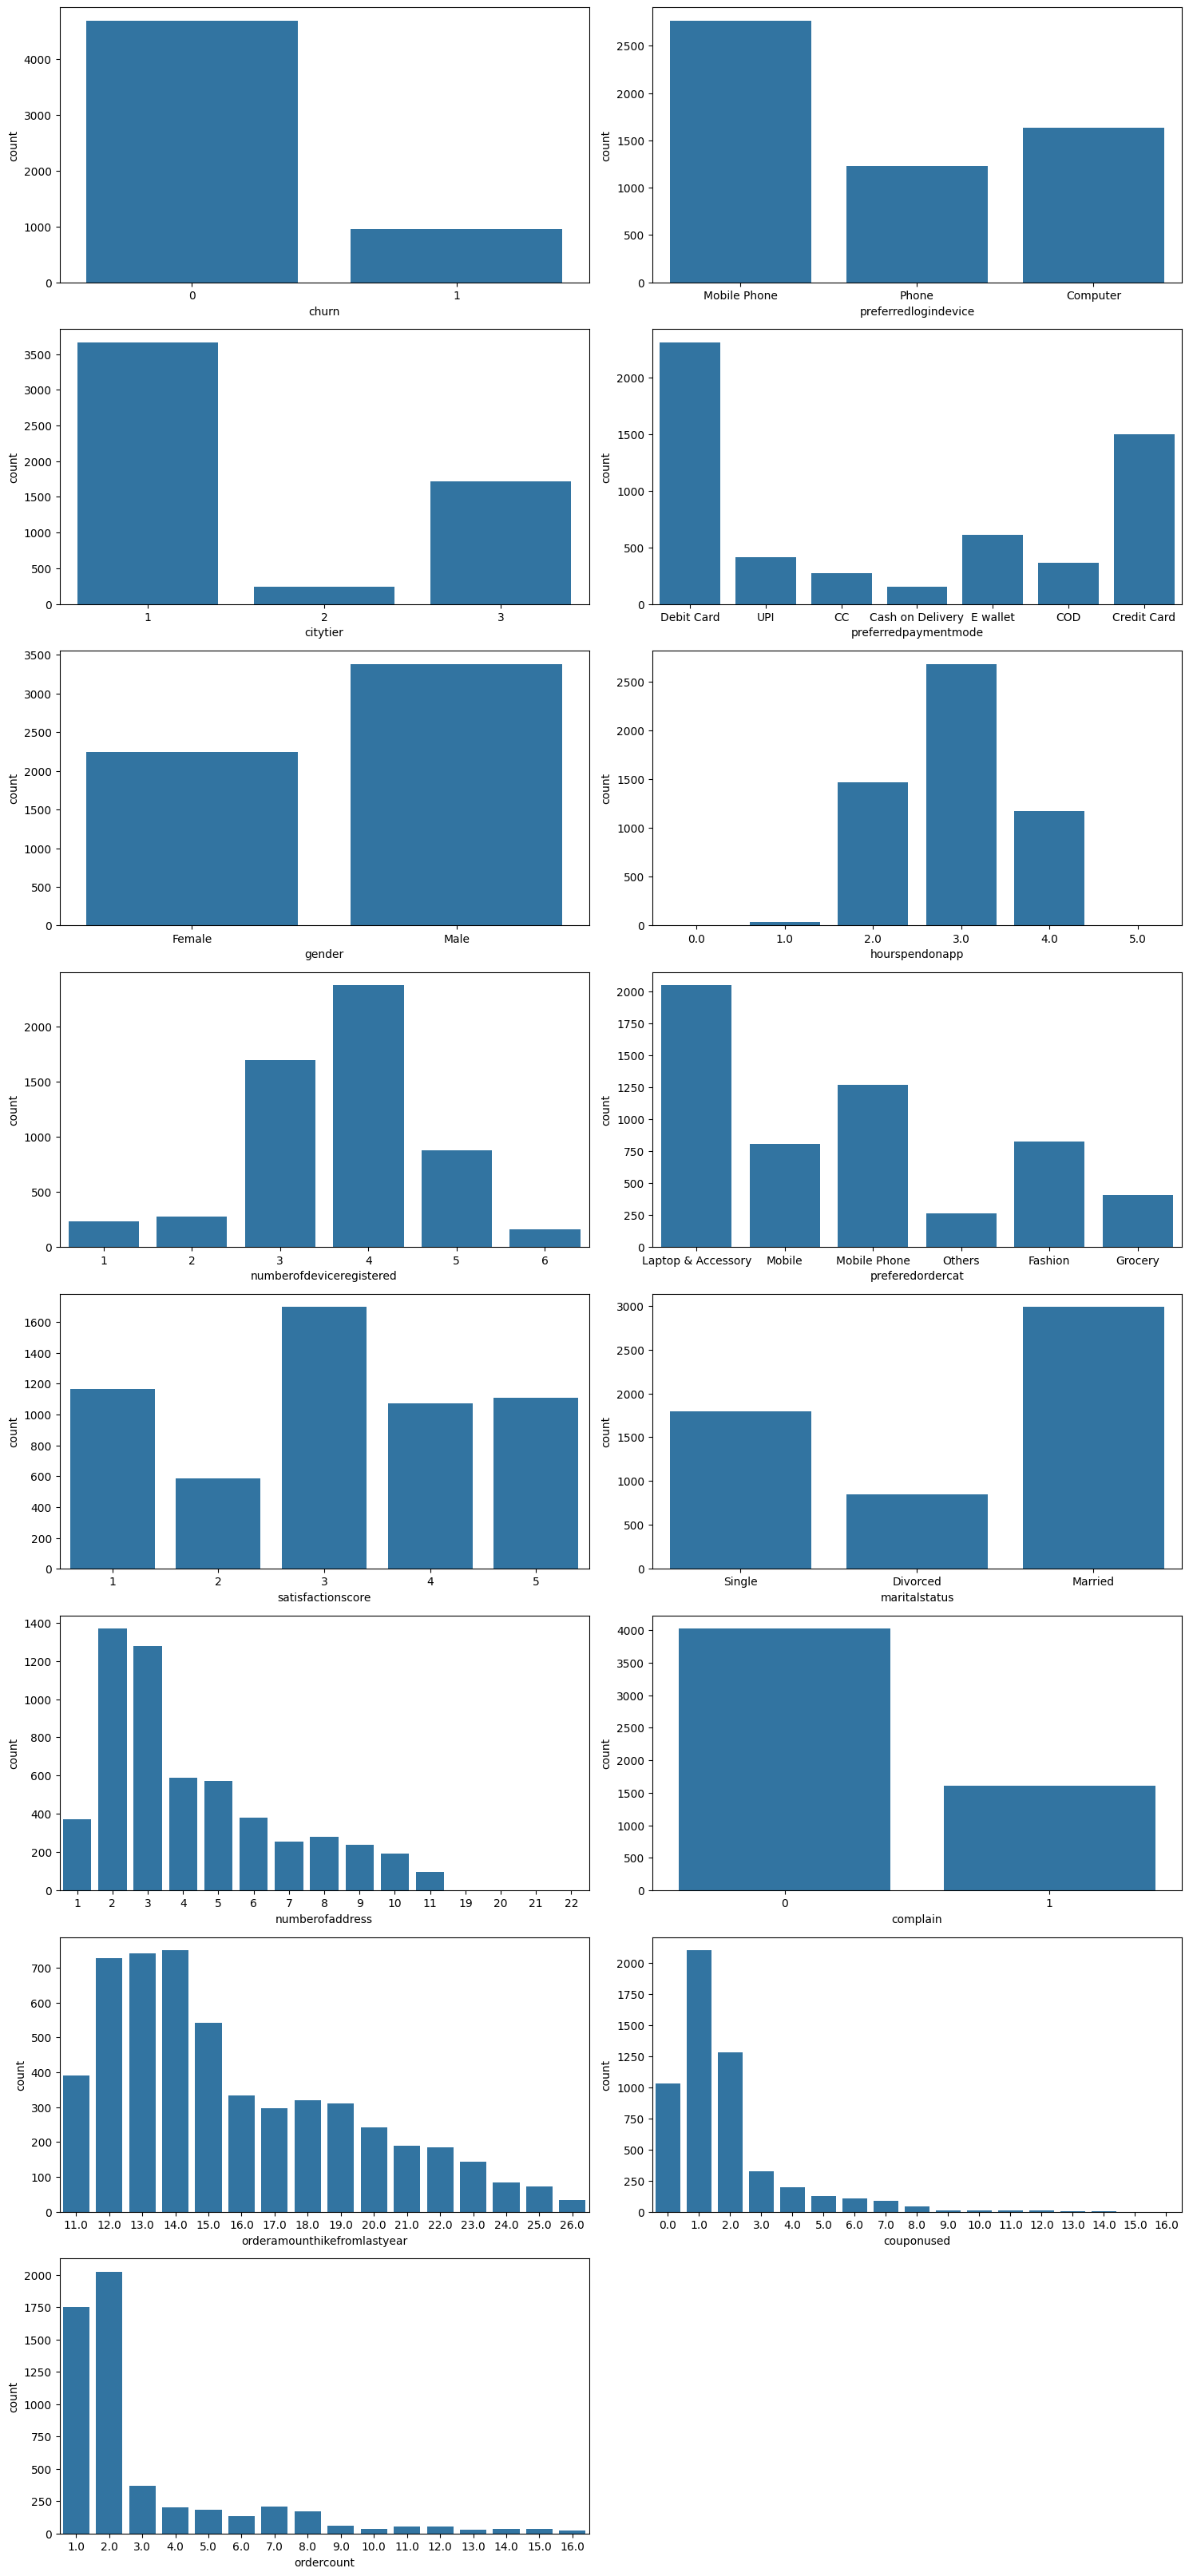

In [16]:
plt.figure(figsize=(15,40))
plot_num=1
for col in count_col:
    plt.subplot(10,2,plot_num)
    sns.countplot(data=df, x = col)
    plot_num +=1
    plt.tight_layout()

Visualizing the categorical columns indicates:
1. About 83.2 % of the customers were retained, while 16.8% churned.
2. The company also has more male than female clients.
3. Most clients prefer logging in from their mobile phones to their phones and computers.
4. Most clients spend an average of 2 and 4 hours on the company’s app.
5. Most customers have about 3 or 4 devices registered for the retailer’s app.
6. Most customers prefer debit and credit cards to make payments.
7. City tier 2 has the lowest number of customers

### Histogram of numerical columns

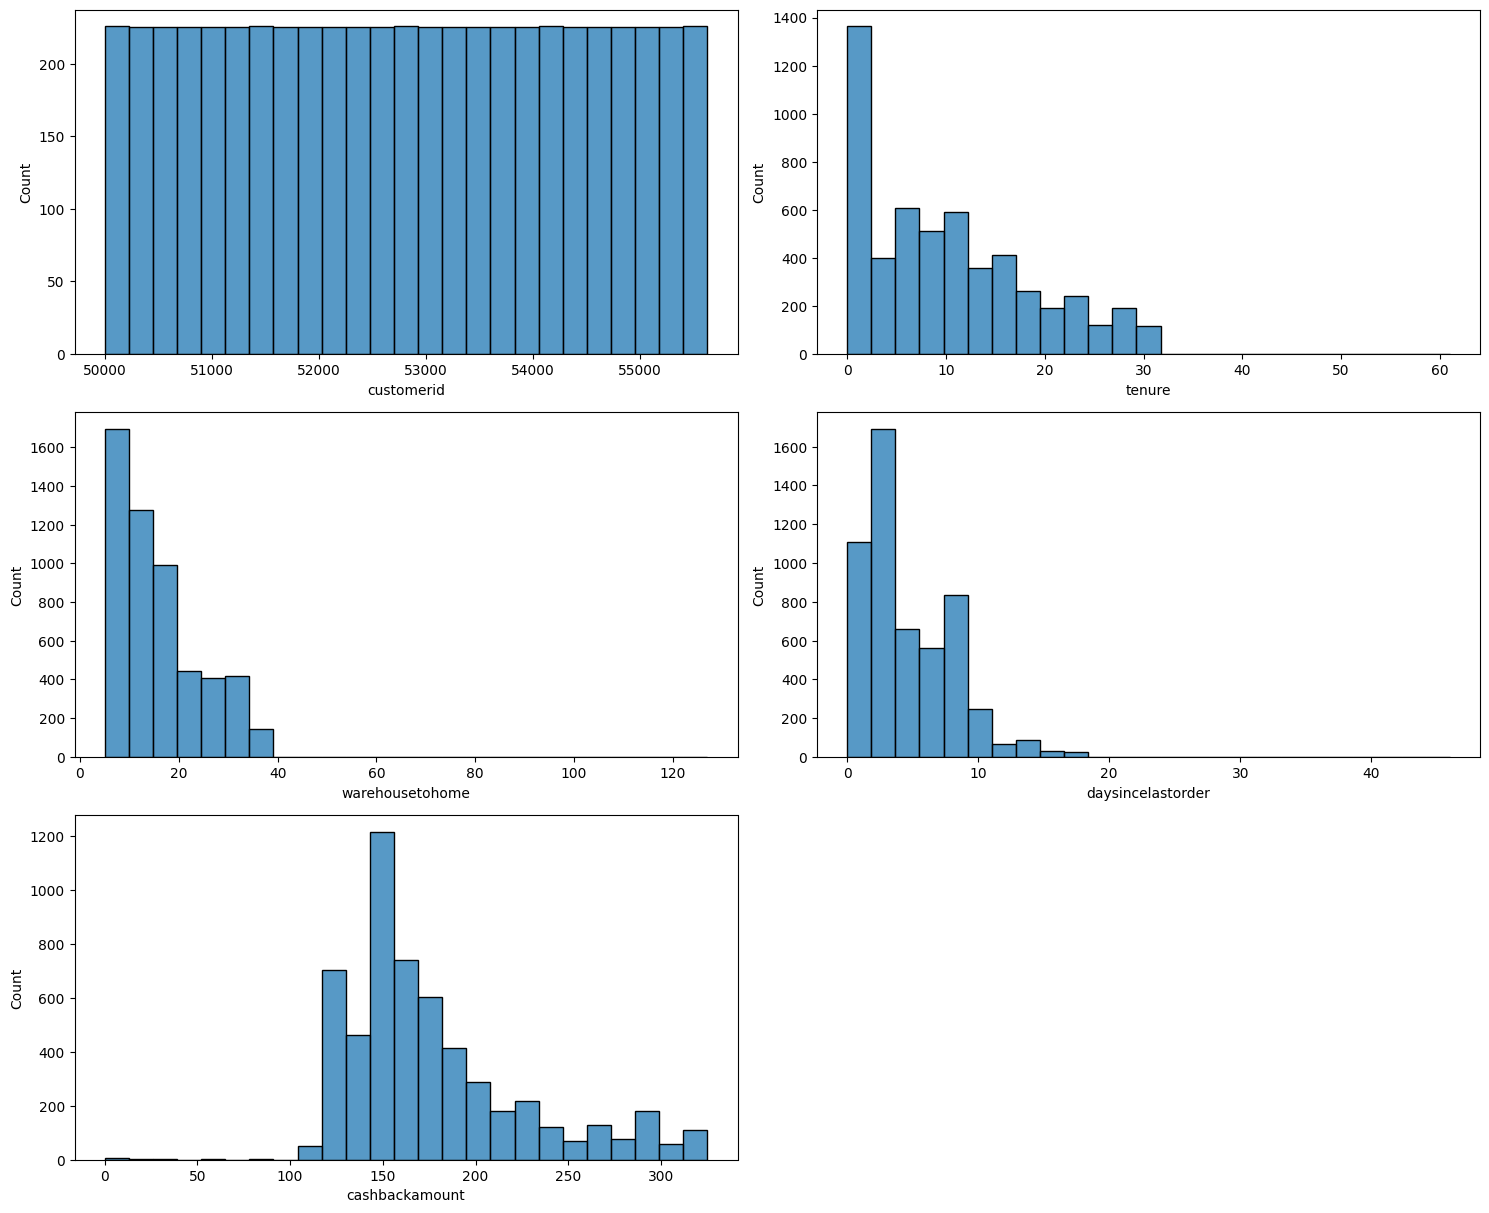

In [17]:
plt.figure(figsize=(15,40))
plot_num=1
for col in hist_col:
    plt.subplot(10,2,plot_num)
    sns.histplot(data=df, x = col, bins=25)
    plot_num +=1
    plt.tight_layout()

Plotting the churn distribution for each categorical variable

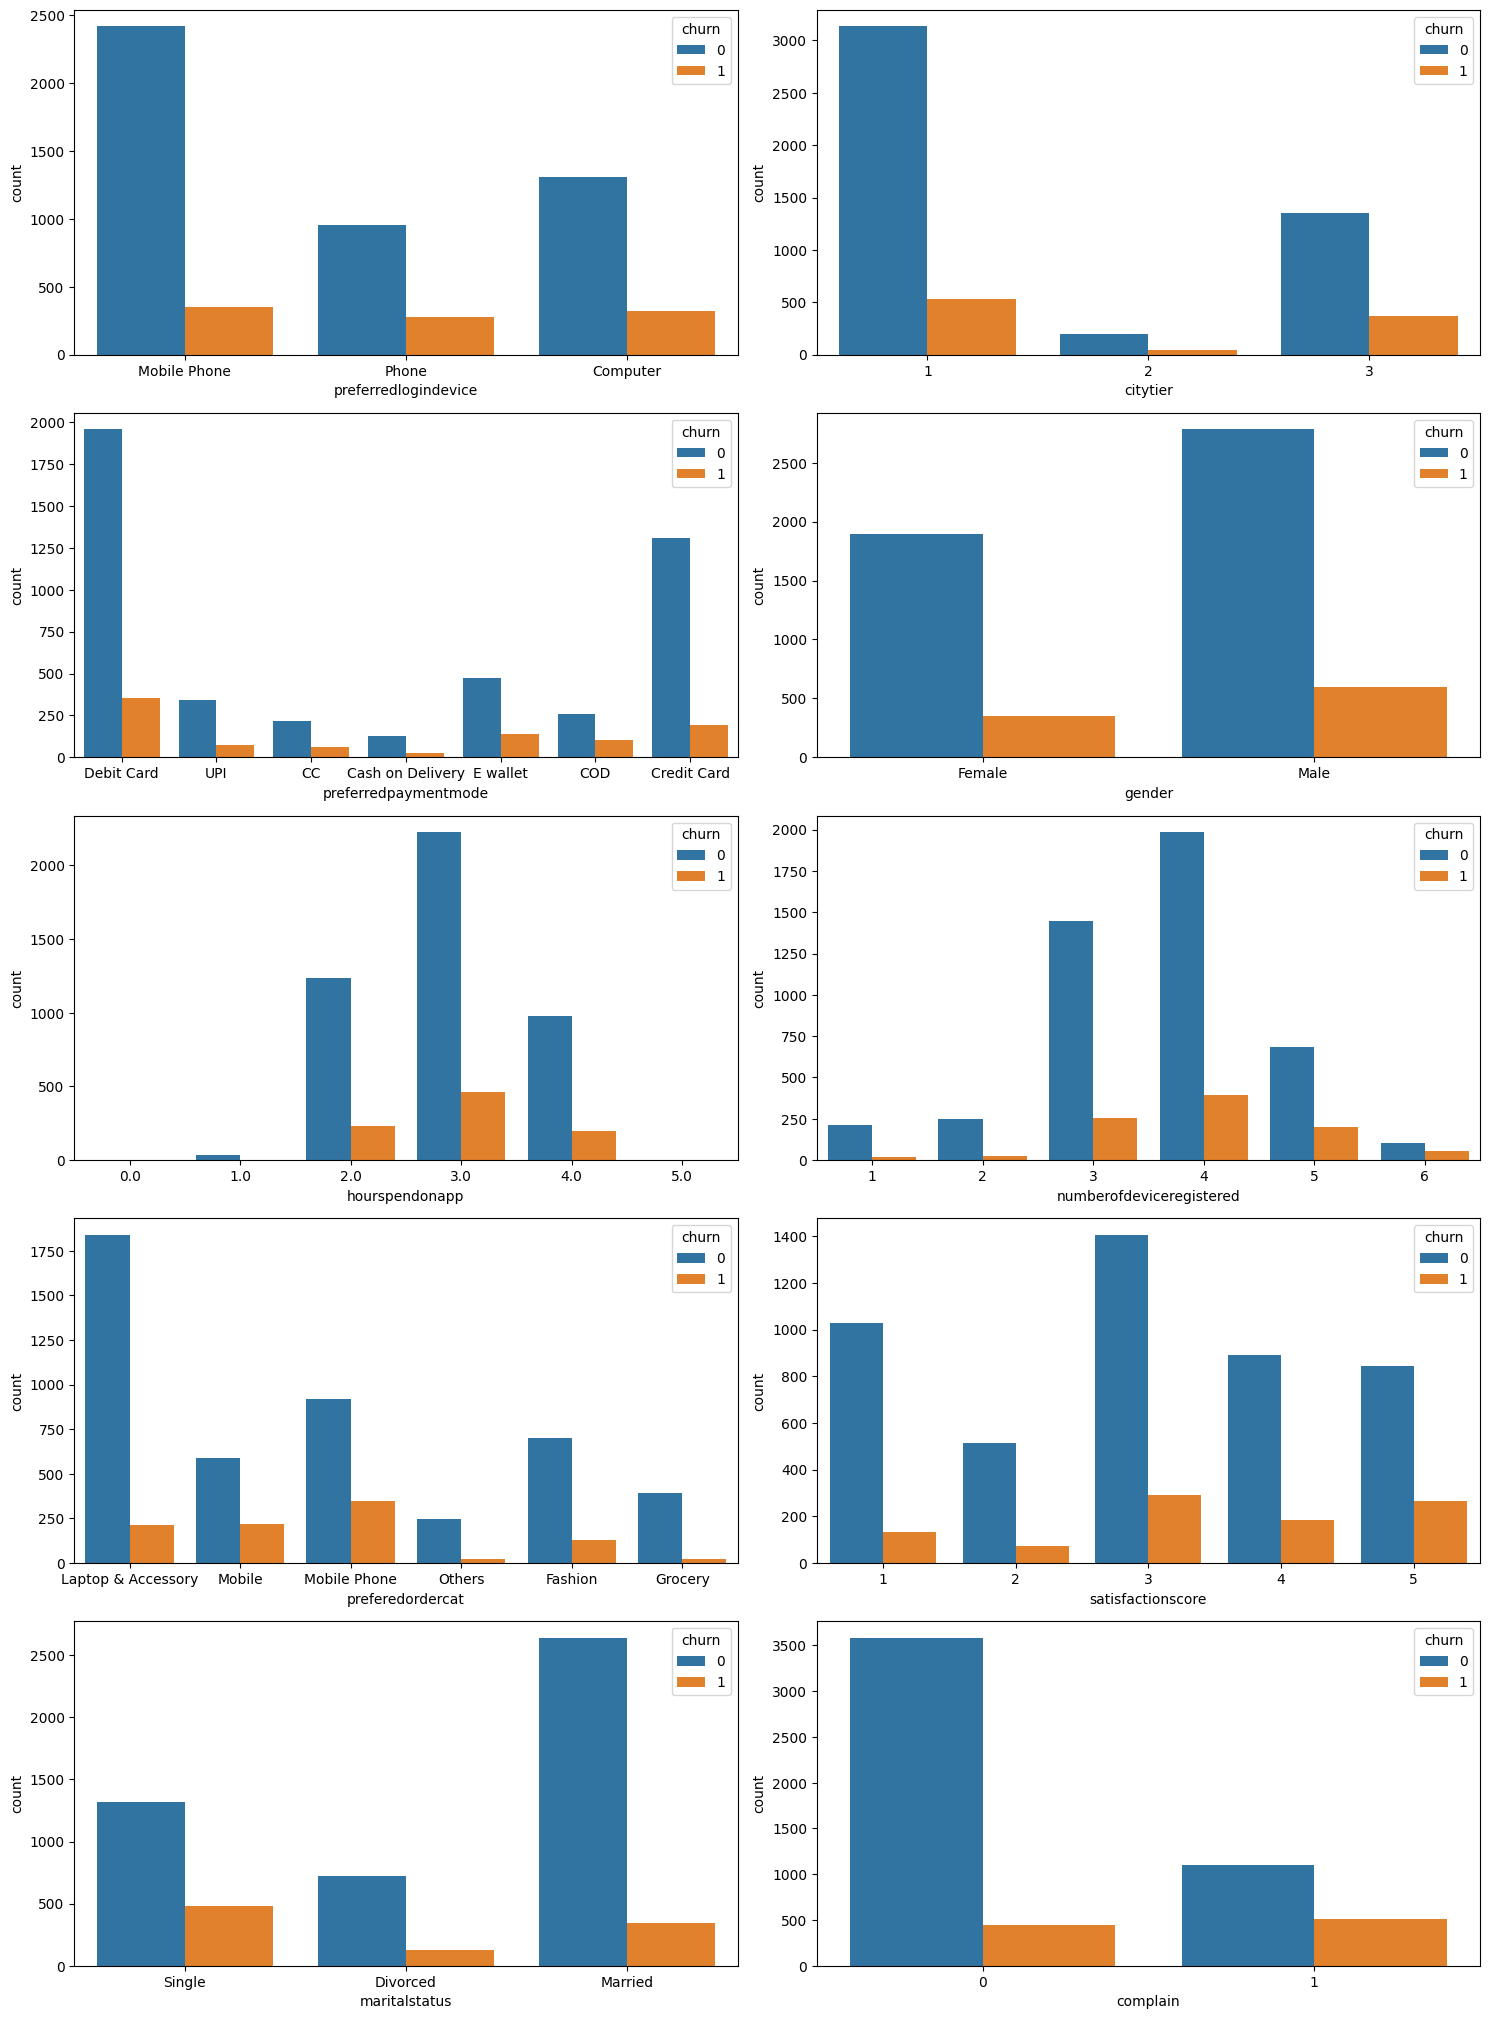

In [18]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    if df[col].nunique() <= 8 and col != "churn":
        plt.subplot(10,2,plot_num)
        sns.countplot(data=df, x=col, hue="churn")
        plot_num += 1
        plt.tight_layout()

#### Impute Missing values